In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
import seaborn as sns

import xgboost as xgb

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

from sklearn.preprocessing import OrdinalEncoder

#df = pd.read_csv('time.csv')
df = pd.read_csv('time.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,Date_Time
0,620469,620469,383138,TWLD23,E10002436,40,2022-08-22,7:21:22:761,7.30,82.0,25.0,2.97,29.4,0.000,No Defect,2022-08-22 07:21:22.761
1,620460,620460,383138,TWLD23,E10002436,40,2022-08-22,7:21:23:289,7.38,82.0,25.0,3.20,29.4,14.027,No Defect,2022-08-22 07:21:23.289
2,620461,620461,383138,TWLD23,E10002436,40,2022-08-22,7:21:23:869,7.23,82.0,25.0,3.13,29.4,12.568,No Defect,2022-08-22 07:21:23.869
3,620462,620462,383138,TWLD23,E10002436,40,2022-08-22,7:21:24:362,6.22,82.0,25.0,3.08,29.4,11.014,No Defect,2022-08-22 07:21:24.362
4,620463,620463,383138,TWLD23,E10002436,40,2022-08-22,7:21:24:872,6.07,82.0,25.0,3.12,29.4,10.705,No Defect,2022-08-22 07:21:24.872


In [2]:
df['Order Operation No'] = np.where((df['Order Operation No'] == '180-'),'180' , df['Order Operation No'])

In [3]:
df['Order Operation No'] = np.where((df['Order Operation No'] == '-240'),'240' , df['Order Operation No'])

In [4]:
df.fillna(0)

,Unnamed: 0.1,Unnamed: 0,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,Date_Time
0,620469,620469,383138,TWLD23,E10002436,40,2022-08-22,7:21:22:761,7.30,82.0,25.0,2.97,29.4,0.000,No Defect,2022-08-22 07:21:22.761
1,620460,620460,383138,TWLD23,E10002436,40,2022-08-22,7:21:23:289,7.38,82.0,25.0,3.20,29.4,14.027,No Defect,2022-08-22 07:21:23.289
2,620461,620461,383138,TWLD23,E10002436,40,2022-08-22,7:21:23:869,7.23,82.0,25.0,3.13,29.4,12.568,No Defect,2022-08-22 07:21:23.869
3,620462,620462,383138,TWLD23,E10002436,40,2022-08-22,7:21:24:362,6.22,82.0,25.0,3.08,29.4,11.014,No Defect,2022-08-22 07:21:24.362
4,620463,620463,383138,TWLD23,E10002436,40,2022-08-22,7:21:24:872,6.07,82.0,25.0,3.12,29.4,10.705,No Defect,2022-08-22 07:21:24.872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826789,333258,333258,387268,TWLD23,0,180,2022-09-19,22:43:28:946,0.88,80.0,23.0,0.00,31.2,0.000,No Defect,2022-09-19 22:43:28.946
826790,333259,333259,387268,TWLD23,0,180,2022-09-19,22:43:29:444,1.90,80.0,23.0,0.00,31.2,0.000,No Defect,2022-09-19 22:43:29.444
826791,333260,333260,387268,TWLD23,0,180,2022-09-19,22:43:30:51,1.73,80.0,23.0,0.00,31.2,0.000,No Defect,2022-09-19 22:43:30.510
826792,333261,333261,387268,TWLD23,0,180,2022-09-19,22:43:30:569,1.46,80.0,23.0,0.00,31.2,0.000,No Defect,2022-09-19 22:43:30.569


In [5]:
df.isnull().sum()

Unnamed: 0.1               0
Unnamed: 0                 0
Employee Code              0
Machine                    0
Production            278180
Order Operation No         0
Date                       0
Time                       0
Current                    3
Humidity                   0
Temperature                0
Flow                       0
Job Temp                   0
Voltage                    0
Defect                     0
Date_Time                  0
dtype: int64

In [6]:
df = df.astype({"Current":"float","Humidity":"float","Temperature":"float","Flow":"float","Job Temp":"float","Voltage":"float"})

In [7]:
df = df.astype({"Machine":"str","Production":"str","Order Operation No":"str","Employee Code":"str"})

In [8]:
df = df.astype({"Order Operation No":"str"})

In [9]:
df = df.astype({"Date":"str","Time":"str"})

In [10]:
df["Date_Time"] = df["Date"].str[:10] + ' ' + df["Time"]
df["Date_Time"] = pd.to_datetime(df["Date_Time"],format="%Y-%m-%d %H:%M:%S:%f")

In [11]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','Date','Time','Machine'], axis=1)

In [12]:
df = df.rename(index=str, columns={"Job Temp": "JobTemp"})

In [13]:
df = df[df.Production != '-']

In [14]:
df["ID"] = df.index

In [15]:
df = df.dropna()

In [16]:
cols = list(df.columns.values)
print(cols)

['Employee Code', 'Production', 'Order Operation No', 'Current', 'Humidity', 'Temperature', 'Flow', 'JobTemp', 'Voltage', 'Defect', 'Date_Time', 'ID']


In [17]:
df = df[[ 'ID','Date_Time','Employee Code', 'Production', 'Order Operation No', 'Current', 'Humidity', 'Temperature', 'Flow', 'JobTemp', 'Voltage', 'Defect']]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826791 entries, 0 to 826793
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  826791 non-null  object        
 1   Date_Time           826791 non-null  datetime64[ns]
 2   Employee Code       826791 non-null  object        
 3   Production          826791 non-null  object        
 4   Order Operation No  826791 non-null  object        
 5   Current             826791 non-null  float64       
 6   Humidity            826791 non-null  float64       
 7   Temperature         826791 non-null  float64       
 8   Flow                826791 non-null  float64       
 9   JobTemp             826791 non-null  float64       
 10  Voltage             826791 non-null  float64       
 11  Defect              826791 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 82.0+ MB


In [19]:
df = df.sort_values(by='Date_Time')

In [20]:
df['Defect'].value_counts()

No Defect             821038
Tungsten Inclusion      4610
Porosity                1143
Name: Defect, dtype: int64

In [21]:
dfx = df[(df["Defect"]=="Porosity")|(df["Defect"]=="Tungsten Inclusion")]
dfx = dfx[['Date_Time','ID']]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826791 entries, 0 to 826793
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  826791 non-null  object        
 1   Date_Time           826791 non-null  datetime64[ns]
 2   Employee Code       826791 non-null  object        
 3   Production          826791 non-null  object        
 4   Order Operation No  826791 non-null  object        
 5   Current             826791 non-null  float64       
 6   Humidity            826791 non-null  float64       
 7   Temperature         826791 non-null  float64       
 8   Flow                826791 non-null  float64       
 9   JobTemp             826791 non-null  float64       
 10  Voltage             826791 non-null  float64       
 11  Defect              826791 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 82.0+ MB


## Feature Engineering

### Add Seconds Column

import datetime
rating = []
for row in df['Date_Time']:
    rating.append((row - df.iloc[0]["Date_Time"]).total_seconds())
df["Seconds"] = rating

df['date_issued:day_of_week'] = df['Date_Time'].dt.day_of_week
df['date_issued:is_weekend'] = np.where(df['date_issued:day_of_week'].isin([5,6]), 1,0)
df

df = df.drop(['date_issued:day_of_week'], axis=1)

In [23]:
feature_window = 10

In [24]:
dft = df
dfx = dft[(dft["Defect"]=="Porosity")|(dft["Defect"]=="Tungsten Inclusion")]
dfx = dfx[['Date_Time','ID']]
dfx = dfx.rename(index=str, columns={"Date_Time": "Defect_Time"})
dfx["Defect_Time"] = pd.to_datetime(dfx['Defect_Time'])

In [25]:
dfx = dfx.sort_values(by=["ID"])
dft = dft.sort_values(by=["ID"])
dft = dft.merge(dfx,on="ID",how = 'left')

In [26]:
dft['Defect_Time'].iloc[0] = df["Date_Time"].iloc[0]

In [27]:
dft['Defect_Time'] = dft['Defect_Time'].fillna(method = 'ffill')

In [28]:
dft['C'] = dft['Date_Time'] - dft['Defect_Time']
dft['TIME_SINCE_ld'] = dft['C'] / np.timedelta64(1, 'm')
dft=dft.drop(columns=['C'])
dft['too_soon'] = np.where((dft.TIME_SINCE_ld < feature_window) , 1, 0)

In [29]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826791 entries, 0 to 826790
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  826791 non-null  object        
 1   Date_Time           826791 non-null  datetime64[ns]
 2   Employee Code       826791 non-null  object        
 3   Production          826791 non-null  object        
 4   Order Operation No  826791 non-null  object        
 5   Current             826791 non-null  float64       
 6   Humidity            826791 non-null  float64       
 7   Temperature         826791 non-null  float64       
 8   Flow                826791 non-null  float64       
 9   JobTemp             826791 non-null  float64       
 10  Voltage             826791 non-null  float64       
 11  Defect              826791 non-null  object        
 12  Defect_Time         826791 non-null  datetime64[ns]
 13  TIME_SINCE_ld       826791 no

In [30]:
# Humidity

dft['Humidity_mean'] = np.where((dft.too_soon == 0),(dft['Humidity'].rolling(min_periods=1, window=feature_window).mean()) , dft.Humidity)
dft['Humidity_median'] = np.where((dft.too_soon == 0),(dft['Humidity'].rolling(min_periods=1, window=feature_window).median()) , dft.Humidity)
dft['Humidity_max'] = np.where((dft.too_soon == 0),(dft['Humidity'].rolling(min_periods=1, window=feature_window).max()) , dft.Humidity)
dft['Humidity_min'] = np.where((dft.too_soon == 0),(dft['Humidity'].rolling(min_periods=1, window=feature_window).min()) , dft.Humidity)
dft['Humidity_chg'] = np.where((dft.Humidity_mean == 0),0 , dft.Humidity/dft.Humidity_mean)

In [31]:
# Current

dft['Current_mean'] = np.where((dft.too_soon == 0),(dft['Current'].rolling(min_periods=1, window=feature_window).mean()) , dft.Current)
dft['Current_median'] = np.where((dft.too_soon == 0),(dft['Current'].rolling(min_periods=1, window=feature_window).median()) , dft.Current)
dft['Current_max'] = np.where((dft.too_soon == 0),(dft['Current'].rolling(min_periods=1, window=feature_window).max()) , dft.Current)
dft['Current_min'] = np.where((dft.too_soon == 0),(dft['Current'].rolling(min_periods=1, window=feature_window).min()) , dft.Current)
dft['Current_chg'] = np.where((dft.Current_mean == 0),0 , dft.Current/dft.Current_mean)

In [32]:
# Temperature

dft['Temperature_mean'] = np.where((dft.too_soon == 0),(dft['Temperature'].rolling(min_periods=1, window=feature_window).mean()) , dft.Temperature)
dft['Temperature_median'] = np.where((dft.too_soon == 0),(dft['Temperature'].rolling(min_periods=1, window=feature_window).median()) , dft.Temperature)
dft['Temperature_max'] = np.where((dft.too_soon == 0),(dft['Temperature'].rolling(min_periods=1, window=feature_window).max()) , dft.Temperature)
dft['Temperature_min'] = np.where((dft.too_soon == 0),(dft['Temperature'].rolling(min_periods=1, window=feature_window).min()) , dft.Temperature)
dft['Temperature_chg'] = np.where((dft.Temperature_mean == 0),0 , dft.Temperature/dft.Temperature_mean)

In [33]:
# Flow

dft['Flow_mean'] = np.where((dft.too_soon == 0),(dft['Flow'].rolling(min_periods=1, window=feature_window).mean()) , dft.Flow)
dft['Flow_median'] = np.where((dft.too_soon == 0),(dft['Flow'].rolling(min_periods=1, window=feature_window).median()) , dft.Flow)
dft['Flow_max'] = np.where((dft.too_soon == 0),(dft['Flow'].rolling(min_periods=1, window=feature_window).max()) , dft.Flow)
dft['Flow_min'] = np.where((dft.too_soon == 0),(dft['Flow'].rolling(min_periods=1, window=feature_window).min()) , dft.Flow)
dft['Flow_chg'] = np.where((dft.Flow_mean == 0),0 , dft.Flow/dft.Flow_mean)

In [34]:
# Voltage

dft['Voltage_mean'] = np.where((dft.too_soon == 0),(dft['Voltage'].rolling(min_periods=1, window=feature_window).mean()) , dft.Voltage)
dft['Voltage_median'] = np.where((dft.too_soon == 0),(dft['Voltage'].rolling(min_periods=1, window=feature_window).median()) , dft.Voltage)
dft['Voltage_max'] = np.where((dft.too_soon == 0),(dft['Voltage'].rolling(min_periods=1, window=feature_window).max()) , dft.Voltage)
dft['Voltage_min'] = np.where((dft.too_soon == 0),(dft['Voltage'].rolling(min_periods=1, window=feature_window).min()) , dft.Voltage)
dft['Voltage_chg'] = np.where((dft.Voltage_mean == 0),0 , dft.Voltage/dft.Voltage_mean)

In [35]:
# JobTemp

dft['JobTemp_mean'] = np.where((dft.too_soon == 0),(dft['JobTemp'].rolling(min_periods=1, window=feature_window).mean()) , dft.JobTemp)
dft['JobTemp_median'] = np.where((dft.too_soon == 0),(dft['JobTemp'].rolling(min_periods=1, window=feature_window).median()) , dft.JobTemp)
dft['JobTemp_max'] = np.where((dft.too_soon == 0),(dft['JobTemp'].rolling(min_periods=1, window=feature_window).max()) , dft.JobTemp)
dft['JobTemp_min'] = np.where((dft.too_soon == 0),(dft['JobTemp'].rolling(min_periods=1, window=feature_window).min()) , dft.JobTemp)
dft['JobTemp_chg'] = np.where((dft.JobTemp_mean == 0),0 , dft.JobTemp/dft.JobTemp_mean)

In [36]:
df = dft

In [37]:
df = df.drop(['Defect_Time','too_soon','TIME_SINCE_ld'],axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826791 entries, 0 to 826790
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  826791 non-null  object        
 1   Date_Time           826791 non-null  datetime64[ns]
 2   Employee Code       826791 non-null  object        
 3   Production          826791 non-null  object        
 4   Order Operation No  826791 non-null  object        
 5   Current             826791 non-null  float64       
 6   Humidity            826791 non-null  float64       
 7   Temperature         826791 non-null  float64       
 8   Flow                826791 non-null  float64       
 9   JobTemp             826791 non-null  float64       
 10  Voltage             826791 non-null  float64       
 11  Defect              826791 non-null  object        
 12  Humidity_mean       826791 non-null  float64       
 13  Humidity_median     826791 no

# EDA
+ No. of defects with time
+ No. of defects within week

+ Cumulative instances for each operations
+ Current vs Job temp defect kde cluster | flow | voltage | Tenp | humidity

In [39]:
# Member on
df = df.assign(day = df.Date_Time.dt.day,day_of_week = df.Date_Time.dt.weekday,day_name = df.Date_Time.dt.day_name())                          

In [40]:
df['just_date'] = df['Date_Time'].dt.date

In [41]:
p = df[~(df['Defect']=="No Defect")].value_counts('just_date').sort_index()
defectCount = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of Defects'])

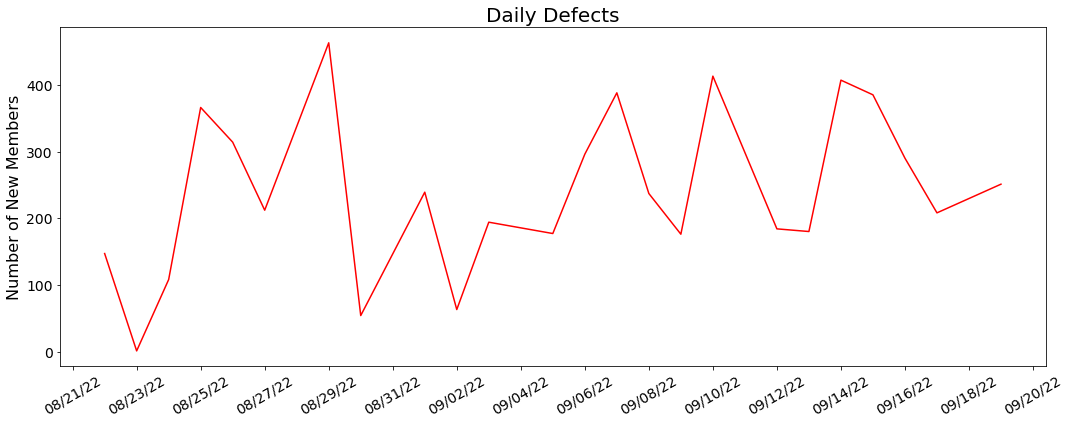

In [42]:
import matplotlib.dates as mdates

plt.figure(figsize = (15,6))
ax = sns.lineplot(x = defectCount.index.values, y = defectCount['Number of Defects'],color='r')
date_format = mdates.DateFormatter('%D')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 2))

plt.xticks(text = ax.xaxis.get_label(), fontsize = 14, rotation = 30)
plt.yticks(text = ax.yaxis.get_label(), fontsize = 14)
plt.ylabel('Number of Defects', fontsize = 16)
plt.title('Daily Defects', fontsize = 20)
plt.tight_layout()
plt.show()

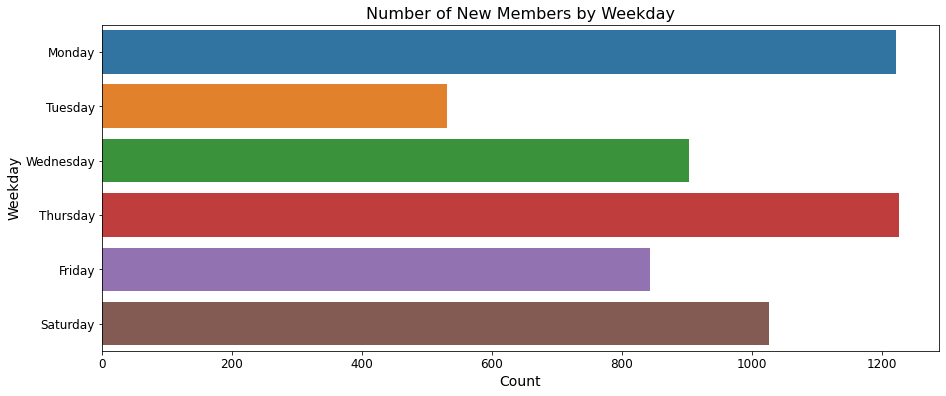

In [43]:
plt.figure(figsize = (15,6))
sns.countplot(data = df[~(df['Defect']=="No Defect")].sort_values('day_of_week'), y = 'day_name')
plt.title('Number of Defects by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); 
plt.ylabel('Weekday', fontsize = 14)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


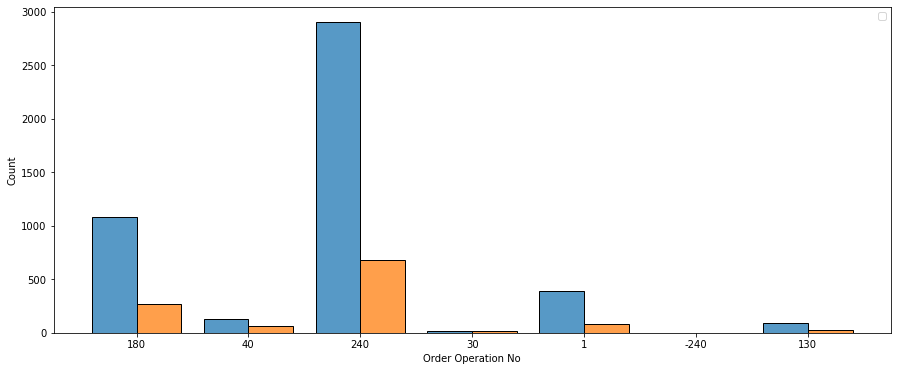

In [44]:
plt.figure(figsize=(15,6))
tempd = df[~(df['Defect']=="No Defect")].copy()

sns.histplot(data=tempd, x="Order Operation No", hue="Defect", multiple="dodge", shrink=.8,stat = "count")
seaborn = plt.legend().get_frame()
seaborn.set_facecolor ('white')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


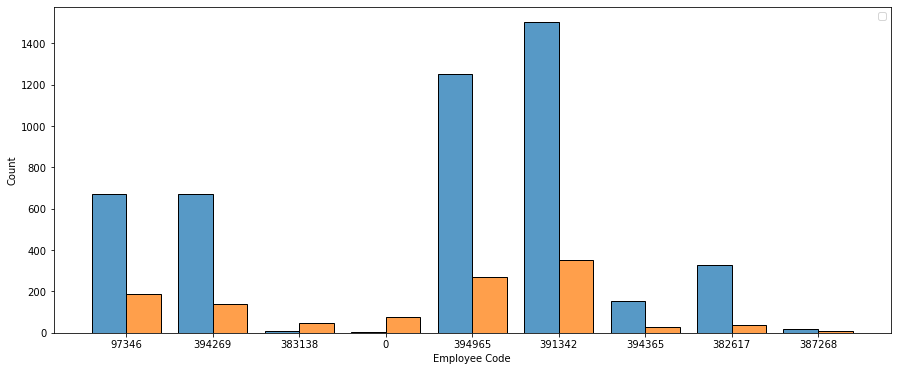

In [45]:
plt.figure(figsize=(15,6))
tempd = df[~(df['Defect']=="No Defect")].copy()
sns.histplot(data=tempd, x="Employee Code", hue="Defect", multiple="dodge", shrink=.8,stat = "count")
seaborn = plt.legend().get_frame()
seaborn.set_facecolor ('white')
plt.show()

In [ ]:

fig1 , axes = plt.subplots(nrows=6,ncols=1 , figsize = (14,10))

axes[0].set_title("KDE Plot (Current)")
sns.kdeplot(tempd['Current'],color = 'r',shade=True,cut=0,ax=axes[0],hue=tempd['Defect'])
# Shade under the density curve using the "shade" parameter
axes[1].set_title("KDE Plot (Humidity)")
sns.kdeplot(tempd['Humidity'],color = 'r',shade=True,cut=0,ax=axes[1],hue=tempd['Defect'])

axes[2].set_title("KDE Plot (Temperature)")
sns.kdeplot(tempd['Temperature'],color = 'r',shade=True,cut=0,ax=axes[2],hue=tempd['Defect'])

axes[3].set_title("KDE Plot (JobTemp)")
sns.kdeplot(tempd['JobTemp'],color = 'r',shade=True,cut=0,ax=axes[3],hue=tempd['Defect'])

axes[4].set_title("KDE Plot (Flow)")
sns.kdeplot(tempd['Flow'],color = 'r',shade=True,cut=0,ax=axes[4],hue=tempd['Defect'])

axes[5].set_title("KDE Plot (Voltage)")
sns.kdeplot(tempd['Voltage'],color = 'r',shade=True,cut=0,ax=axes[5],hue=tempd['Defect'])

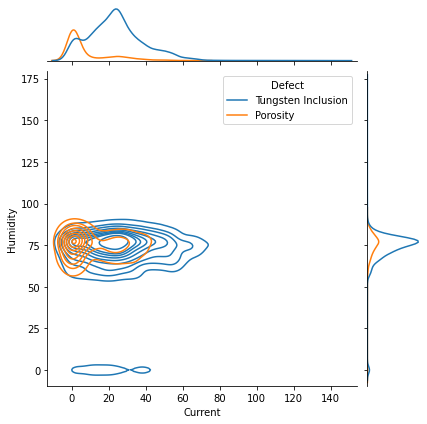

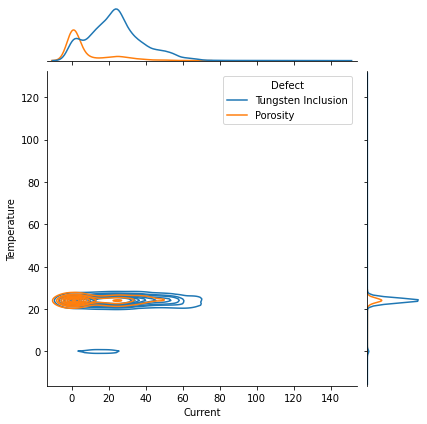

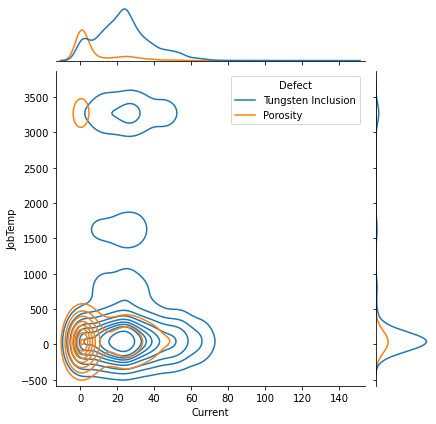

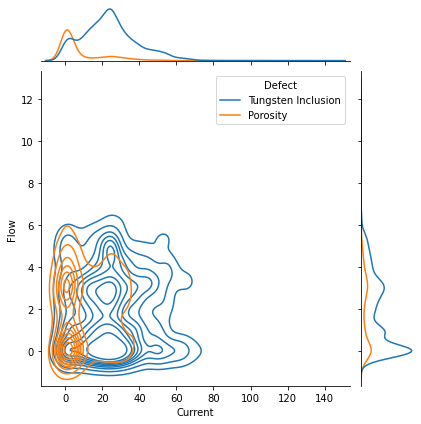

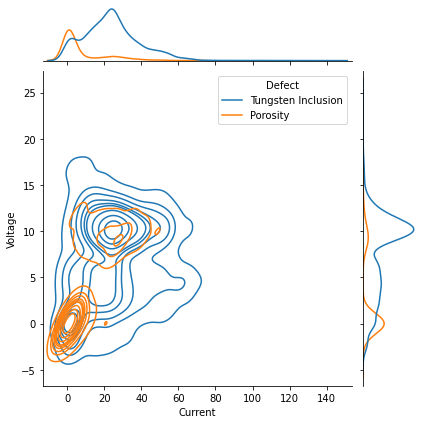

In [47]:
figsize=(18, 6)

sns.jointplot(data=tempd, x='Current', y='Humidity',hue='Defect',kind='kde')
sns.jointplot(data=tempd, x='Current', y='Temperature',hue='Defect',kind='kde')
sns.jointplot(data=tempd, x='Current', y='JobTemp',hue='Defect',kind='kde')
sns.jointplot(data=tempd, x='Current', y='Flow',hue='Defect',kind='kde')
sns.jointplot(data=tempd, x='Current', y='Voltage',hue='Defect',kind='kde')


In [48]:
df.value_counts('Employee Code')

Employee Code
391342    256882
394965    174984
97346     117426
394269    114821
0          66820
382617     36025
383138     27295
394365     23922
387268      8616
dtype: int64

## Create Testing , Training and Validation

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826791 entries, 0 to 826790
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  826791 non-null  object        
 1   Date_Time           826791 non-null  datetime64[ns]
 2   Employee Code       826791 non-null  object        
 3   Production          826791 non-null  object        
 4   Order Operation No  826791 non-null  object        
 5   Current             826791 non-null  float64       
 6   Humidity            826791 non-null  float64       
 7   Temperature         826791 non-null  float64       
 8   Flow                826791 non-null  float64       
 9   JobTemp             826791 non-null  float64       
 10  Voltage             826791 non-null  float64       
 11  Defect              826791 non-null  object        
 12  Humidity_mean       826791 non-null  float64       
 13  Humidity_median     826791 no

In [50]:
np.random.seed(42)
df['wookie'] = (np.random.randint(0, 10000, df.shape[0]))/10000

In [51]:
df['MODELING_GROUP'] = np.where(((df.wookie <= 0.35)), 'TRAINING', np.where(((df.wookie <= 0.65)), 'VALIDATION', 'TESTING'))

In [52]:
tips_summed = df.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       289827
TRAINING      288848
VALIDATION    248116
Name: wookie, dtype: int64

In [53]:
tips_summed = df.groupby(['MODELING_GROUP'])['Defect'].count()
tips_summed

MODELING_GROUP
TESTING       289827
TRAINING      288848
VALIDATION    248116
Name: Defect, dtype: int64

In [54]:
df_training=df[df['MODELING_GROUP'] == 'TRAINING']
df_training=df_training.drop(columns=['MODELING_GROUP','wookie'])

In [55]:
df_test=df[df['MODELING_GROUP'] == 'TESTING']
df_test=df_test.drop(columns=['MODELING_GROUP','wookie'])
df_test.shape

(289827, 46)

In [56]:
df_validation=df[df['MODELING_GROUP'] == 'VALIDATION']
df_validation=df_validation.drop(columns=['MODELING_GROUP','wookie'])
df_validation.shape

(248116, 46)

In [57]:
df_total=df.drop(columns=['wookie'])

In [58]:
df['Defect'].value_counts()

No Defect             821038
Tungsten Inclusion      4610
Porosity                1143
Name: Defect, dtype: int64

# SMOTE

In [59]:
col = df_training.columns.values
col

array(['ID', 'Date_Time', 'Employee Code', 'Production',
       'Order Operation No', 'Current', 'Humidity', 'Temperature', 'Flow',
       'JobTemp', 'Voltage', 'Defect', 'Humidity_mean', 'Humidity_median',
       'Humidity_max', 'Humidity_min', 'Humidity_chg', 'Current_mean',
       'Current_median', 'Current_max', 'Current_min', 'Current_chg',
       'Temperature_mean', 'Temperature_median', 'Temperature_max',
       'Temperature_min', 'Temperature_chg', 'Flow_mean', 'Flow_median',
       'Flow_max', 'Flow_min', 'Flow_chg', 'Voltage_mean',
       'Voltage_median', 'Voltage_max', 'Voltage_min', 'Voltage_chg',
       'JobTemp_mean', 'JobTemp_median', 'JobTemp_max', 'JobTemp_min',
       'JobTemp_chg', 'day', 'day_of_week', 'day_name', 'just_date'],
      dtype=object)

In [60]:
training_features=df_training[['Employee Code', 'Production',
       'Order Operation No', 'Current', 'Humidity', 'Temperature', 'Flow',
       'JobTemp', 'Voltage', 'Humidity_mean',
       'Humidity_median', 'Humidity_max', 'Humidity_min', 'Humidity_chg',
       'Temperature_mean', 'Temperature_median', 'Temperature_max',
       'Temperature_min', 'Temperature_chg', 'Flow_mean', 'Flow_median',
       'Flow_max', 'Flow_min', 'Flow_chg', 'Voltage_mean',
       'Voltage_median', 'Voltage_max', 'Voltage_min', 'Voltage_chg',
       'JobTemp_mean', 'JobTemp_median', 'JobTemp_max', 'JobTemp_min',
       'JobTemp_chg']]
training_target=df_training[['Defect']]

In [61]:
smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2])
x_res, y_res = smx.fit_resample(training_features, training_target)

In [62]:
df_x=pd.DataFrame(x_res)
df_x.columns = ['Employee Code', 'Production',
       'Order Operation No', 'Current', 'Humidity', 'Temperature', 'Flow',
       'JobTemp', 'Voltage', 'Humidity_mean',
       'Humidity_median', 'Humidity_max', 'Humidity_min', 'Humidity_chg',
       'Temperature_mean', 'Temperature_median', 'Temperature_max',
       'Temperature_min', 'Temperature_chg', 'Flow_mean', 'Flow_median',
       'Flow_max', 'Flow_min', 'Flow_chg', 'Voltage_mean',
       'Voltage_median', 'Voltage_max', 'Voltage_min', 'Voltage_chg',
       'JobTemp_mean', 'JobTemp_median', 'JobTemp_max', 'JobTemp_min',
       'JobTemp_chg']

In [63]:
df_y=pd.DataFrame(y_res)
df_y.columns = ['Defect']

In [64]:
df_y.value_counts()

Defect            
No Defect             286869
Porosity              286869
Tungsten Inclusion    286869
dtype: int64

In [65]:
df_balanced = pd.concat([df_x, df_y], axis=1)

# Get dummies

In [66]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860607 entries, 0 to 860606
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Employee Code       860607 non-null  object 
 1   Production          860607 non-null  object 
 2   Order Operation No  860607 non-null  object 
 3   Current             860607 non-null  float64
 4   Humidity            860607 non-null  float64
 5   Temperature         860607 non-null  float64
 6   Flow                860607 non-null  float64
 7   JobTemp             860607 non-null  float64
 8   Voltage             860607 non-null  float64
 9   Humidity_mean       860607 non-null  float64
 10  Humidity_median     860607 non-null  float64
 11  Humidity_max        860607 non-null  float64
 12  Humidity_min        860607 non-null  float64
 13  Humidity_chg        860607 non-null  float64
 14  Temperature_mean    860607 non-null  float64
 15  Temperature_median  860607 non-nul

In [67]:
df_balanced["Employee Code"].value_counts()

391342    273966
394965    253719
97346     114697
394269     87367
0          45230
394365     33526
382617     30210
383138     18741
387268      3151
Name: Employee Code, dtype: int64

In [68]:
df_dv = pd.get_dummies(df_balanced['Employee Code'])

df_balanced= pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['Production'])

df_balanced = pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['Order Operation No'])

df_balanced = pd.concat([df_balanced, df_dv], axis=1)

In [69]:
df_dv = pd.get_dummies(df_test['Employee Code'])

df_test= pd.concat([df_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_test['Production'])

df_test = pd.concat([df_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_test['Order Operation No'])

df_test = pd.concat([df_test, df_dv], axis=1)

In [70]:
df_test.info() # Add above cell for train_test and total_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289827 entries, 0 to 826787
Data columns (total 80 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  289827 non-null  object        
 1   Date_Time           289827 non-null  datetime64[ns]
 2   Employee Code       289827 non-null  object        
 3   Production          289827 non-null  object        
 4   Order Operation No  289827 non-null  object        
 5   Current             289827 non-null  float64       
 6   Humidity            289827 non-null  float64       
 7   Temperature         289827 non-null  float64       
 8   Flow                289827 non-null  float64       
 9   JobTemp             289827 non-null  float64       
 10  Voltage             289827 non-null  float64       
 11  Defect              289827 non-null  object        
 12  Humidity_mean       289827 non-null  float64       
 13  Humidity_median     289827 no

# Training Models

In [71]:
df_balanced=df_balanced.drop(columns=['Employee Code','Production','Order Operation No'])

In [72]:
features = [x for x in df_balanced.columns if x not in ['Defect']]  
dependent=pd.DataFrame(df_balanced['Defect'])
independent=df_balanced.drop(columns=['Defect'])
dependent.columns

Index(['Defect'], dtype='object')

In [73]:
enc = OrdinalEncoder()
dependent = enc.fit_transform(dependent)
dependent = pd.DataFrame(data=dependent)
dependent.columns = ['Defect']

In [74]:
dependent.value_counts()

Defect
0.0       286869
1.0       286869
2.0       286869
dtype: int64

In [75]:
# Show all messages, including ones pertaining to debugging
xgb.set_config(verbosity=2)

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

def evaluate_model(alg, train, target, predictors,  early_stopping_rounds=1):
    
   
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['Defect'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g',figsize=(18, 6)) 
    plt.ylabel('Feature Importance Score')
        
    #Print model report:
    #print("\nModel Report")
    #print("Accuracy : %.4g" % accuracy_score(target['Defect'].values, dtrain_predictions))
    #print("AUC Score (Balanced): %f" % roc_auc_score(target['Defect'], dtrain_predprob))

In [77]:
xgb0 = xgb.XGBClassifier(objective = 'mult:softprob',learning_rate = 0.1,
n_estimators=250,max_depth=10,
gamma=1);

[13:21:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 662 extra nodes, 20 pruned nodes, max_depth=10
[13:21:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 664 extra nodes, 24 pruned nodes, max_depth=10
[13:21:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 822 extra nodes, 74 pruned nodes, max_depth=10
[13:21:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 684 extra nodes, 30 pruned nodes, max_depth=10
[13:21:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431

[13:23:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 438 extra nodes, 50 pruned nodes, max_depth=10
[13:23:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 872 extra nodes, 72 pruned nodes, max_depth=10
[13:23:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 660 extra nodes, 98 pruned nodes, max_depth=10
[13:23:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 452 extra nodes, 48 pruned nodes, max_depth=10
[13:23:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431

[13:24:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 792 extra nodes, 80 pruned nodes, max_depth=10
[13:24:18] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 588 extra nodes, 102 pruned nodes, max_depth=10
[13:24:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 356 extra nodes, 80 pruned nodes, max_depth=10
[13:24:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 838 extra nodes, 76 pruned nodes, max_depth=10
[13:24:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:25:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 262 extra nodes, 74 pruned nodes, max_depth=10
[13:25:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 438 extra nodes, 54 pruned nodes, max_depth=10
[13:25:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 808 extra nodes, 98 pruned nodes, max_depth=10
[13:25:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 220 extra nodes, 56 pruned nodes, max_depth=10
[13:25:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431

[13:26:49] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 60 pruned nodes, max_depth=10
[13:26:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 618 extra nodes, 120 pruned nodes, max_depth=10
[13:26:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 376 extra nodes, 90 pruned nodes, max_depth=10
[13:26:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 274 extra nodes, 72 pruned nodes, max_depth=10
[13:26:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:28:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 234 extra nodes, 50 pruned nodes, max_depth=10
[13:28:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 460 extra nodes, 154 pruned nodes, max_depth=10
[13:28:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 350 extra nodes, 94 pruned nodes, max_depth=10
[13:28:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 38 pruned nodes, max_depth=10
[13:28:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:29:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 398 extra nodes, 96 pruned nodes, max_depth=10
[13:29:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 174 extra nodes, 36 pruned nodes, max_depth=10
[13:29:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 570 extra nodes, 122 pruned nodes, max_depth=10
[13:29:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 306 extra nodes, 104 pruned nodes, max_depth=10
[13:29:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de4

[13:30:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 220 extra nodes, 90 pruned nodes, max_depth=10
[13:30:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 384 extra nodes, 120 pruned nodes, max_depth=10
[13:30:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 94 pruned nodes, max_depth=10
[13:30:47] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 306 extra nodes, 76 pruned nodes, max_depth=10
[13:30:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:31:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 32 pruned nodes, max_depth=10
[13:31:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 408 extra nodes, 34 pruned nodes, max_depth=10
[13:31:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 494 extra nodes, 126 pruned nodes, max_depth=10
[13:32:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 312 extra nodes, 116 pruned nodes, max_depth=10
[13:32:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de4

[13:33:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 144 extra nodes, 66 pruned nodes, max_depth=10
[13:33:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 214 extra nodes, 44 pruned nodes, max_depth=10
[13:33:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 404 extra nodes, 178 pruned nodes, max_depth=10
[13:33:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 70 pruned nodes, max_depth=10
[13:33:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:34:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 246 extra nodes, 138 pruned nodes, max_depth=10
[13:34:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 604 extra nodes, 158 pruned nodes, max_depth=10
[13:34:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 452 extra nodes, 142 pruned nodes, max_depth=10
[13:34:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 270 extra nodes, 80 pruned nodes, max_depth=10
[13:34:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:35:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 350 extra nodes, 118 pruned nodes, max_depth=10
[13:35:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 180 extra nodes, 76 pruned nodes, max_depth=10
[13:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 188 extra nodes, 128 pruned nodes, max_depth=10
[13:35:25] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 550 extra nodes, 170 pruned nodes, max_depth=10
[13:35:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:36:27] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 294 extra nodes, 122 pruned nodes, max_depth=10
[13:36:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 262 extra nodes, 118 pruned nodes, max_depth=10
[13:36:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 234 extra nodes, 44 pruned nodes, max_depth=10
[13:36:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 398 extra nodes, 88 pruned nodes, max_depth=10
[13:36:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de4

[13:37:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 58 pruned nodes, max_depth=10
[13:37:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 406 extra nodes, 136 pruned nodes, max_depth=10
[13:37:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 224 extra nodes, 72 pruned nodes, max_depth=10
[13:37:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 78 pruned nodes, max_depth=10
[13:37:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:38:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 172 extra nodes, 120 pruned nodes, max_depth=10
[13:38:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 674 extra nodes, 188 pruned nodes, max_depth=10
[13:38:51] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 394 extra nodes, 172 pruned nodes, max_depth=10
[13:38:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 286 extra nodes, 130 pruned nodes, max_depth=10
[13:38:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03d

[13:40:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 306 extra nodes, 86 pruned nodes, max_depth=10
[13:40:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 222 extra nodes, 130 pruned nodes, max_depth=10
[13:40:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 264 extra nodes, 170 pruned nodes, max_depth=10
[13:40:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 476 extra nodes, 204 pruned nodes, max_depth=10
[13:40:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:41:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 106 extra nodes, 48 pruned nodes, max_depth=10
[13:41:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 280 extra nodes, 142 pruned nodes, max_depth=10
[13:41:10] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 470 extra nodes, 178 pruned nodes, max_depth=10
[13:41:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 196 extra nodes, 146 pruned nodes, max_depth=10
[13:41:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:42:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 268 extra nodes, 66 pruned nodes, max_depth=10
[13:42:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 382 extra nodes, 190 pruned nodes, max_depth=10
[13:42:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 514 extra nodes, 178 pruned nodes, max_depth=10
[13:42:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 116 pruned nodes, max_depth=10
[13:42:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:43:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 52 pruned nodes, max_depth=10
[13:43:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 384 extra nodes, 280 pruned nodes, max_depth=10
[13:43:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 352 extra nodes, 244 pruned nodes, max_depth=10
[13:43:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 292 extra nodes, 102 pruned nodes, max_depth=10
[13:43:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:44:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 424 extra nodes, 258 pruned nodes, max_depth=10
[13:44:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 232 extra nodes, 88 pruned nodes, max_depth=10
[13:44:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 424 extra nodes, 228 pruned nodes, max_depth=10
[13:44:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 84 pruned nodes, max_depth=10
[13:44:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:45:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 346 extra nodes, 270 pruned nodes, max_depth=10
[13:45:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 90 pruned nodes, max_depth=10
[13:45:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 196 extra nodes, 132 pruned nodes, max_depth=10
[13:45:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 130 extra nodes, 134 pruned nodes, max_depth=10
[13:45:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:46:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 154 extra nodes, 104 pruned nodes, max_depth=10
[13:46:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 100 pruned nodes, max_depth=10
[13:46:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 412 extra nodes, 200 pruned nodes, max_depth=10
[13:46:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 194 pruned nodes, max_depth=10
[13:46:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:47:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 200 pruned nodes, max_depth=10
[13:47:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 108 pruned nodes, max_depth=10
[13:47:44] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 162 pruned nodes, max_depth=10
[13:47:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 386 extra nodes, 226 pruned nodes, max_depth=10
[13:47:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03d

[13:48:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 84 pruned nodes, max_depth=10
[13:48:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 114 extra nodes, 178 pruned nodes, max_depth=10
[13:48:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 266 extra nodes, 236 pruned nodes, max_depth=10
[13:49:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 182 extra nodes, 168 pruned nodes, max_depth=10
[13:49:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de4

[13:50:08] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 316 extra nodes, 170 pruned nodes, max_depth=10
[13:50:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 196 pruned nodes, max_depth=10
[13:50:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 364 extra nodes, 304 pruned nodes, max_depth=10
[13:50:14] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 110 pruned nodes, max_depth=10
[13:50:16] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:51:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 192 extra nodes, 162 pruned nodes, max_depth=10
[13:51:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 78 extra nodes, 152 pruned nodes, max_depth=10
[13:51:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 324 extra nodes, 310 pruned nodes, max_depth=10
[13:51:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 74 pruned nodes, max_depth=10
[13:51:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:52:29] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 30 extra nodes, 30 pruned nodes, max_depth=10
[13:52:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 90 pruned nodes, max_depth=10
[13:52:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 134 extra nodes, 144 pruned nodes, max_depth=10
[13:52:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 242 pruned nodes, max_depth=10
[13:52:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431

[13:53:31] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 236 extra nodes, 180 pruned nodes, max_depth=10
[13:53:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 142 extra nodes, 164 pruned nodes, max_depth=10
[13:53:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 200 extra nodes, 198 pruned nodes, max_depth=10
[13:53:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 198 pruned nodes, max_depth=10
[13:53:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:54:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 116 pruned nodes, max_depth=10
[13:54:33] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 50 pruned nodes, max_depth=10
[13:54:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 186 extra nodes, 252 pruned nodes, max_depth=10
[13:54:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 232 extra nodes, 150 pruned nodes, max_depth=10
[13:54:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de4

[13:55:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 86 extra nodes, 78 pruned nodes, max_depth=10
[13:55:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 146 pruned nodes, max_depth=10
[13:55:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 150 extra nodes, 144 pruned nodes, max_depth=10
[13:55:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 96 extra nodes, 174 pruned nodes, max_depth=10
[13:55:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de43

[13:56:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 194 pruned nodes, max_depth=10
[13:56:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 82 pruned nodes, max_depth=10
[13:56:58] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 42 pruned nodes, max_depth=10
[13:57:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 316 pruned nodes, max_depth=10
[13:57:03] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431

[13:58:05] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 124 pruned nodes, max_depth=10
[13:58:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 126 extra nodes, 68 pruned nodes, max_depth=10
[13:58:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 308 pruned nodes, max_depth=10
[13:58:11] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 102 extra nodes, 118 pruned nodes, max_depth=10
[13:58:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[13:59:13] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 154 pruned nodes, max_depth=10
[13:59:15] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 306 extra nodes, 268 pruned nodes, max_depth=10
[13:59:17] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 194 pruned nodes, max_depth=10
[13:59:19] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 184 extra nodes, 162 pruned nodes, max_depth=10
[13:59:21] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de

[14:00:20] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 252 extra nodes, 202 pruned nodes, max_depth=10
[14:00:22] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 122 pruned nodes, max_depth=10
[14:00:24] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 46 pruned nodes, max_depth=9
[14:00:26] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 278 pruned nodes, max_depth=10
[14:00:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431b

[14:01:30] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 94 pruned nodes, max_depth=10
[14:01:32] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 70 pruned nodes, max_depth=10
[14:01:34] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 150 pruned nodes, max_depth=10
[14:01:36] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 202 pruned nodes, max_depth=10
[14:01:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431b

[14:02:35] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 22 extra nodes, 152 pruned nodes, max_depth=9
[14:02:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 136 pruned nodes, max_depth=10
[14:02:39] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 66 pruned nodes, max_depth=10
[14:02:40] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 54 pruned nodes, max_depth=10
[14:02:42] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba2

[14:03:41] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 28 extra nodes, 296 pruned nodes, max_depth=10
[14:03:43] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 134 pruned nodes, max_depth=7
[14:03:45] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 118 pruned nodes, max_depth=10
[14:03:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 164 pruned nodes, max_depth=0
[14:03:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba2

[14:04:46] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 124 pruned nodes, max_depth=9
[14:04:48] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 54 extra nodes, 82 pruned nodes, max_depth=10
[14:04:50] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 72 pruned nodes, max_depth=0
[14:04:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 138 pruned nodes, max_depth=10
[14:04:53] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

[14:05:52] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 58 pruned nodes, max_depth=0
[14:05:54] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 282 pruned nodes, max_depth=0
[14:05:56] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 70 pruned nodes, max_depth=10
[14:05:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 146 extra nodes, 180 pruned nodes, max_depth=10
[14:05:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba262

[14:06:57] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 104 pruned nodes, max_depth=0
[14:06:59] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 84 pruned nodes, max_depth=10
[14:07:01] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 228 extra nodes, 362 pruned nodes, max_depth=10
[14:07:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 104 pruned nodes, max_depth=0
[14:07:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26

[14:08:02] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 160 pruned nodes, max_depth=10
[14:08:04] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 24 extra nodes, 100 pruned nodes, max_depth=9
[14:08:06] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 80 extra nodes, 148 pruned nodes, max_depth=10
[14:08:07] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 112 extra nodes, 170 pruned nodes, max_depth=10
[14:08:09] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431

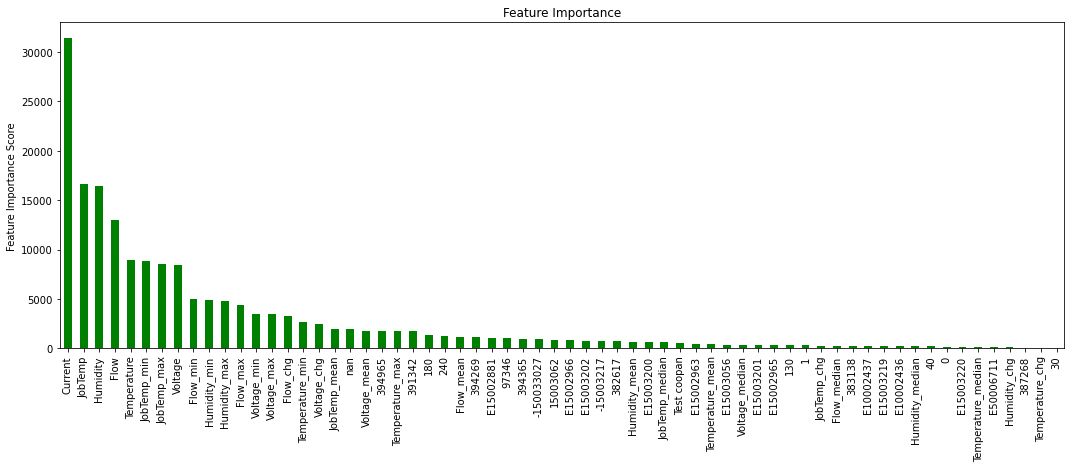

In [78]:
evaluate_model(xgb0, independent, dependent,features)

# Evaluating the model

In [79]:
df_testing = df_test[features]
y_true = pd.DataFrame(df_test['Defect'])
y_true = enc.fit_transform(pd.DataFrame(df_test['Defect']))
y_pred = xgb0.predict(df_testing)

[[286777    263    741]
 [   414      1      0]
 [  1139      0    492]]


<AxesSubplot:>

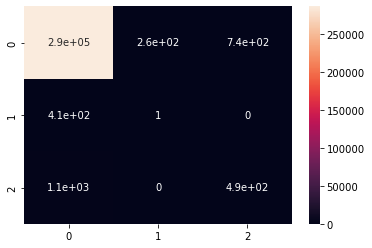

In [82]:
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
sns.heatmap(y_true, annot=True)